# Activity 9

This activity tests your skills
in approaching an engineering problem
as solving a system of nonlinear algebraic equations.

## Scenario

Referring to [the diagram](./act-09.png),
a device has an active power consumption $P$
when operating at a lagging power factor $\Phi$.
The requisite power is conveyed by the
resistance $R$,
inductance $L$
and the capacitor $C$,
from a source
configured to provide a steady RMS voltage $U$
at a steady frequency $F$.

You are to solve for the following quantities.
- $V$, the RMS operating voltage of the device
- $\delta_{\text{l}}$,
  the phase angle of the voltage phasor at which the device receives power
- $\delta_{\text{s}}$
  the phase angle of the voltage phasor provided by the source

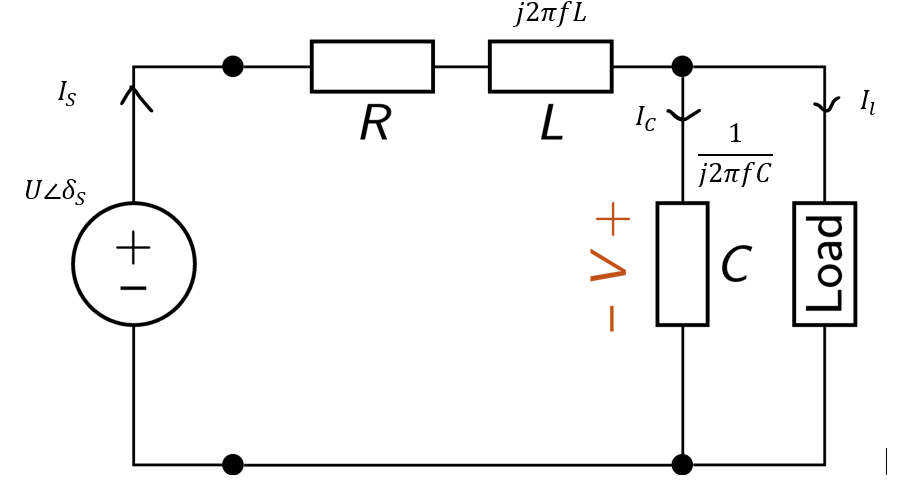

## Modelling

Cast the original task as
solving a system of nonlinear algebraic equations
in three unknowns
(namely, $V$, $\delta_{\text{l}}$, and $\delta_{\text{s}}$).
Introduce a vector $\boldsymbol{x}$ 
to collect the unknowns in the order presented above,
so that the system of equations can be written in vector form as
$\boldsymbol{f}\!\left(\boldsymbol{x}\right) = \boldsymbol{0}$.
Set the voltage phasor across the input terminals of the load
to have the reference phase angle.

## Solution

- The load is absorbing active / real power: $P$
- The load has a lagging power factor: $\Phi ; pf = \cos {\Phi}$
$$ S = P + j P \tan (\cos^{-1} \Phi) $$
- let $ \omega = 2\pi f$
- Impdances:
$$ Z_R = R$$
$$ Z_L = j \omega L$$
$$ Z_C = (j \omega C)^{-1}$$

- Load Voltage as the reference: $V_L = V \angle 0 $. This means that we don't need to include finding $\delta_l$ because we set it as reference. Hence, we can reduce the equations we need into only 2. With unknows $\delta_s$ and $V$. 
- Shunt Capacitor Current:
$$ I_C = V_L / Z_c $$
$$ I_C = j \omega CV $$

- Noting that Apparent Power: $ S = P + j P \tan (\cos^{-1} \Phi)$. Then our Load Current:
$$ I_L = (S / V_L)^* $$
$$ I_L = \frac{P - j P \tan (\cos^{-1} \Phi)}{V }\ $$

- Then our Line Current:
$$ I_S = \frac{V - Ue^{j \delta_S}}{R + j \omega L}\ $$

- KCL at top node: $ I_S = I_C + I_L$. 
$$ \frac{V - Ue^{j \delta_S}}{R + j \omega L}\ - j \omega CV - \frac{P - j P \tan (\cos^{-1} \Phi)}{V }\ $$
$$ \frac{V - U \cos \delta_S - j U \sin \delta_S}{R + j \omega L}\ - j \omega CV - \frac{P}{V}\ + j\frac{P \tan (\cos^{-1} \Phi)}{V}\ $$
$$ V - U \cos \delta_S - j U \sin \delta_S - (j \omega CV)(R + j \omega L) - \left(\frac{P}{V}\ \right) (R + j \omega L) + \left (j\frac{P \tan (\cos^{-1} \Phi)}{V}\ \right) (R + j \omega L) $$
$$ V - U \cos \delta_S - j U \sin \delta_S + (\omega)^2 CLV - j \omega CVR - \frac{PR}{V}\ - j \frac{P \omega L}{V}\ + j\frac{PR \tan (\cos^{-1} \Phi)}{V}\ - \frac{P \omega L \tan (\cos^{-1} \Phi)}{V}\ $$

- Separating Real and Imaginary Parts:
$$ f_1 = V - U \cos \delta_S + (\omega)^2 CLV - \frac{PR}{V}\ - \frac{P \omega L \tan (\cos^{-1} \Phi)}{V}\ = 0 $$
$$ f_2 = - U \sin \delta_S - \omega CVR - \frac{P \omega L}{V}\ + \frac{PR \tan (\cos^{-1} \Phi)}{V}\ = 0 $$

## Core code

In [1]:
import math as mt
import numpy as np
import scipy as sp
from scipy.optimize import root

Define a Python function
`f()` that takes

- one positional argument,
  `x`, representing $\boldsymbol{x}$;
  and
- four keyword arguments,
  `U`, `F`, `R`, `L`, `C`, `P`, and `Phi`
  representing $U$, $F$, $R$, $L$, $C$, $P$, and $\Phi$ respectively.

`f()` returns a NumPy array representing
$\boldsymbol{f}\!\left(\boldsymbol{x}\right)$.

Moreover, define a Python function `dfdx()`
that takes the same arguments as `f()`,
and returns a NumPy array representing
the Jacobian of $\boldsymbol{f}\!\left(\boldsymbol{x}\right)$ w.r.t. $\boldsymbol{x}$.


Analytical Derivatives for Jacobian:
$$ \frac{\partial F_1}{\partial V} = \frac{\partial}{\partial V} \left ( V - U \cos \delta_S + (\omega)^2 CLV - \frac{PR}{V}\ - \frac{P \omega L \tan (\cos^{-1} \Phi)}{V}\ \right) $$
$$ \frac{\partial F_1}{\partial V} = 1 + (\omega)^2 CL + \frac{PR}{V^2}\ + \frac{P \omega L \tan (\cos^{-1} \Phi)}{V^2}\ $$

$$ \frac{\partial F_1}{\partial \delta_s} = \frac{\partial}{\partial \delta_s} \left ( V - U \cos \delta_S + (\omega)^2 CLV - \frac{PR}{V}\ - \frac{P \omega L \tan (\cos^{-1} \Phi)}{V}\ \right) $$
$$ \frac{\partial F_1}{\partial \delta_s} = U \sin \delta_S $$

$$ \frac{\partial F_2}{\partial V} = \frac{\partial}{\partial V} \left ( - U \sin \delta_S - \omega CVR - \frac{P \omega L}{V}\ + \frac{PR \tan (\cos^{-1} \Phi)}{V}\ \right) $$
$$ \frac{\partial F_2}{\partial V} = - \omega CR + \frac{P \omega L}{V^2}\ - \frac{PR \tan (\cos^{-1} \Phi)}{V^2}\ $$

$$ \frac{\partial F_2}{\partial \delta_s} = \frac{\partial}{\partial \delta_s} \left ( - U \sin \delta_S - \omega CVR - \frac{P \omega L}{V}\ + \frac{PR \tan (\cos^{-1} \Phi)}{V}\ \right) $$
$$ \frac{\partial F_2}{\partial \delta_s} = - U \cos \delta_S $$

In [2]:
def f(x, U, F, R, L, C, P, Phi):
    """
    x = [V, delta_s]
    returns f(x) = [F1, F2]
    """
    V, delta_s = x
    
    omega = 2 * mt.pi * F
    tanPhi = mt.tan(Phi)
    cosPhi = mt.cos(Phi)
    
    F1 = (
        V
        - (P * R) / V
        - (P * omega * L * mt.tan(mt.acos(Phi))) / V
        + (omega**2) * L * C * V
        - U * mt.cos(delta_s)
    )

    F2 = (
        (P * R * mt.tan(mt.acos(Phi))) / V
        - omega * C * V * R
        - (P * omega * L) / V
        - U * mt.sin(delta_s)
    )
    
    return np.array([F1, F2])

def dfdx(x, *, U, F, R, L, C, P, Phi):
    """
    Jacobian matrix df/dx
    """
    V, delta_s = x

    omega = 2 * mt.pi * F
    tanPhi = mt.tan(Phi)

    dF1_dV = (
        1
        + (P * R) / V**2
        + (P * omega * L * mt.tan(mt.acos(Phi))) / V**2
        + (omega**2) * L * C
    )

    dF1_dds = U * mt.sin(delta_s)

    dF2_dV = (
        -(P * R * mt.tan(mt.acos(Phi))) / V**2
        - omega * C * R
        + (P * omega * L) / V**2
    )

    dF2_dds = -U * mt.cos(delta_s)

    J = np.array([
        [dF1_dV, dF1_dds],
        [dF2_dV, dF2_dds]
    ])

    return J

## Assessment

Every time you solve for $\boldsymbol{x}$,
- define Python variables
  `U`, `F`, `R`, `L`, `C`, `P`, and `PHI`
  for storing the values of parameters
  $U$, $F$, $R$, $L$, $C$, $P$, and $\phi$,
  respectively;
- define a Python variable `x_ini`
  for storing your initial guesses of the variables;
- use [`scipy.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html),
  particularly its `args` keyword argument;
- define a Python variable `x_out` to store $\boldsymbol{x}$;
- verify if $\boldsymbol{f}\!\left(\boldsymbol{x}\right) = \boldsymbol{0}$ is sufficiently satisfied;
- print the value of $V$ in kilovolts;
  and
- print the values of $\delta_{\text{l}}$ and $\delta_{\text{s}}$ in degrees.

### Task 1

Determine $V$, $\delta_{\text{l}}$, and $\delta_{\text{s}}$
when $U$, $F$, $R$, $L$, $C$, $P$, and $\phi$
have respective values of
13.8 kilovolts,
60 hertz,
0.21 ohms, 5.570 millihenrys, 1.560 millifarads,
40 kilowatts, 0.87.

In [3]:
U   = 13.8e3           # volts
F   = 60               # Hz
R   = 0.21             # ohms
L   = 5.570e-3         # H
C   = 1.560e-3         # F
P   = 40e3             # W
PHI = mt.acos(0.87)    # radians (power factor given)

x_ini = np.array([U, 0.1])

sol = root(
    f,
    x_ini,
    args=(U, F, R, L, C, P, PHI),
    jac=lambda x, U, F, R, L, C, P, PHI:
        dfdx(x, U=U, F=F, R=R, L=L, C=C, P=P, Phi=PHI),
    method="hybr"
)

x_out = sol.x
V, delta_s = x_out

residual = f(x_out, U, F, R, L, C, P, PHI)

# delta_l is reference
delta_l = 0.0

print("Converged:", sol.success)
print("Residual f(x):", residual)

print(f"V = {abs(V)/1e3:.3f} kV")
print(f"delta_l = {mt.degrees(delta_l):.3f} degrees")
print(f"delta_s = {mt.degrees(delta_s):.3f} degrees")

Converged: True
Residual f(x): [2.78978405e-08 6.00039129e-10]
V = 6.176 kV
delta_l = 0.000 degrees
delta_s = -3.215 degrees


### Task 2

Determine $V$, $\delta_{\text{l}}$, and $\delta_{\text{s}}$
when $U$, $F$, $R$, $L$, $C$, $P$, and $\phi$
have respective values of
13.8 kilovolts,
50 hertz,
0.17 ohms, 6.685 milllihenrys, 1.872 millifarads,
32 kilowatts, 0.97.

In [4]:
U   = 13.8e3           # volts
F   = 50               # Hz
R   = 0.17             # ohms
L   = 6.685e-3         # H
C   = 1.872e-3         # F
P   = 32e3             # W
PHI = mt.acos(0.97)    # radians (power factor given)

x_ini = np.array([U, 0.1])

sol = root(
    f,
    x_ini,
    args=(U, F, R, L, C, P, PHI),
    jac=lambda x, U, F, R, L, C, P, PHI:
        dfdx(x, U=U, F=F, R=R, L=L, C=C, P=P, Phi=PHI),
    method="hybr"
)

x_out = sol.x
V, delta_s = x_out

residual = f(x_out, U, F, R, L, C, P, PHI)

# delta_l is reference
delta_l = 0.0

print("Converged:", sol.success)
print("Residual f(x):", residual)

print(f"V = {abs(V)/1e3:.3f} kV")
print(f"delta_l = {mt.degrees(delta_l):.3f} degrees")
print(f"delta_s = {mt.degrees(delta_s):.3f} degrees")

Converged: True
Residual f(x): [5.65160008e-09 1.52454049e-10]
V = 6.187 kV
delta_l = 0.000 degrees
delta_s = -2.600 degrees


### Task 3

Determine $V$, $\delta_{\text{l}}$, and $\delta_{\text{s}}$
when $U$, $F$, $R$, $L$, $C$, $P$, and $\phi$
have respective values of
32.5 kilovolts,
60 hertz,
0.21 ohms, 5.570 millihenrys, 1.560 millifarads,
214 kilowatts, 0.87.

In [5]:
U   = 32.5e3           # volts
F   = 60               # Hz
R   = 0.21             # ohms
L   = 5.570e-3         # H
C   = 1.560e-3         # F
P   = 214e3             # W
PHI = mt.acos(0.87)    # radians (power factor given)

x_ini = np.array([U, 0.1])

sol = root(
    f,
    x_ini,
    args=(U, F, R, L, C, P, PHI),
    jac=lambda x, U, F, R, L, C, P, PHI:
        dfdx(x, U=U, F=F, R=R, L=L, C=C, P=P, Phi=PHI),
    method="hybr"
)

x_out = sol.x
V, delta_s = x_out

residual = f(x_out, U, F, R, L, C, P, PHI)

# delta_l is reference
delta_l = 0.0

print("Converged:", sol.success)
print("Residual f(x):", residual)

print(f"V = {abs(V)/1e3:.3f} kV")
print(f"delta_l = {mt.degrees(delta_l):.3f} degrees")
print(f"delta_s = {mt.degrees(delta_s):.3f} degrees")

Converged: True
Residual f(x): [6.22494554e-08 1.33945832e-09]
V = 14.543 kV
delta_l = 0.000 degrees
delta_s = -3.214 degrees


### Task 4

Determine $V$, $\delta_{\text{l}}$, and $\delta_{\text{s}}$
when $U$, $F$, $R$, $L$, $C$, $P$, and $\phi$
have respective values of
32.5 kilovolts,
50 hertz,
0.17 ohms, 6.685 milllihenrys, 1.872 millifarads,
173 kilowatts, 0.97.

In [6]:
U   = 32.5e3           # volts
F   = 50               # Hz
R   = 0.17             # ohms
L   = 6.685e-3         # H
C   = 1.872e-3         # F
P   = 173e3             # W
PHI = mt.acos(0.97)    # radians (power factor given)

x_ini = np.array([U, 0.1])

sol = root(
    f,
    x_ini,
    args=(U, F, R, L, C, P, PHI),
    jac=lambda x, U, F, R, L, C, P, PHI:
        dfdx(x, U=U, F=F, R=R, L=L, C=C, P=P, Phi=PHI),
    method="hybr"
)

x_out = sol.x
V, delta_s = x_out

residual = f(x_out, U, F, R, L, C, P, PHI)

# delta_l is reference
delta_l = 0.0

print("Converged:", sol.success)
print("Residual f(x):", residual)

print(f"V = {abs(V)/1e3:.3f} kV")
print(f"delta_l = {mt.degrees(delta_l):.3f} degrees")
print(f"delta_s = {mt.degrees(delta_s):.3f} degrees")

Converged: True
Residual f(x): [1.24200596e-08 3.34921424e-10]
V = 14.571 kV
delta_l = 0.000 degrees
delta_s = -2.599 degrees


### Task 5

Determine $V$, $\delta_{\text{l}}$, and $\delta_{\text{s}}$
when $U$, $F$, $R$, $L$, $C$, $P$, and $\phi$
have respective values of
69.0 kilovolts,
60 hertz,
0.21 ohms, 5.570 millihenrys, 1.560 millifarads,
421 kilowatts, 0.87.

In [7]:
U   = 69.0e3           # volts
F   = 60               # Hz
R   = 0.21             # ohms
L   = 5.570e-3         # H
C   = 1.560e-3         # F
P   = 421e3             # W
PHI = mt.acos(0.87)    # radians (power factor given)

x_ini = np.array([U, 0.1])

sol = root(
    f,
    x_ini,
    args=(U, F, R, L, C, P, PHI),
    jac=lambda x, U, F, R, L, C, P, PHI:
        dfdx(x, U=U, F=F, R=R, L=L, C=C, P=P, Phi=PHI),
    method="hybr"
)

x_out = sol.x
V, delta_s = x_out

residual = f(x_out, U, F, R, L, C, P, PHI)

# delta_l is reference
delta_l = 0.0

print("Converged:", sol.success)
print("Residual f(x):", residual)

print(f"V = {abs(V)/1e3:.3f} kV")
print(f"delta_l = {mt.degrees(delta_l):.3f} degrees")
print(f"delta_s = {mt.degrees(delta_s):.3f} degrees")

Converged: True
Residual f(x): [2.64466507e-07 5.76392267e-09]
V = 30.848 kV
delta_l = 0.000 degrees
delta_s = -3.185 degrees


### Task 6

Determine $V$, $\delta_{\text{l}}$, and $\delta_{\text{s}}$
when $U$, $F$, $R$, $L$, $C$, $P$, and $\phi$
have respective values of
32.5 kilovolts,
50 hertz,
0.17 ohms, 6.685 milllihenrys, 1.872 millifarads,
317 kilowatts, 0.97.

In [8]:
U   = 32.5e3           # volts
F   = 50               # Hz
R   = 0.17             # ohms
L   = 6.685e-3         # H
C   = 1.872e-3         # F
P   = 317e3             # W
PHI = mt.acos(0.97)    # radians (power factor given)

x_ini = np.array([U, 0.1])

sol = root(
    f,
    x_ini,
    args=(U, F, R, L, C, P, PHI),
    jac=lambda x, U, F, R, L, C, P, PHI:
        dfdx(x, U=U, F=F, R=R, L=L, C=C, P=P, Phi=PHI),
    method="hybr"
)

x_out = sol.x
V, delta_s = x_out

residual = f(x_out, U, F, R, L, C, P, PHI)

# delta_l is reference
delta_l = 0.0

print("Converged:", sol.success)
print("Residual f(x):", residual)

print(f"V = {abs(V)/1e3:.3f} kV")
print(f"delta_l = {mt.degrees(delta_l):.3f} degrees")
print(f"delta_s = {mt.degrees(delta_s):.3f} degrees")

Converged: True
Residual f(x): [3.15085344e-08 8.41055225e-10]
V = 14.607 kV
delta_l = 0.000 degrees
delta_s = -2.630 degrees


## Instructions

Do not use any library or module other than those pre-imported.

### Scoring

In each Task,
- a correct use of
  [`scipy.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html)
  merits two (2) points;
- obtaining a correct $V$ merits two (3) points;
- obtaining a correct $\delta_{\text{l}}$ merits two (3) points;
- obtaining a correct $\delta_{\text{s}}$ merits two (3) points;
  and
- obtaining $\boldsymbol{f}\!\left(\boldsymbol{x}\right)$ close enough to $\boldsymbol{0}$ merits six (9) points.


Every violation of an instruction
means a deduction of one (1) point.

All in all, one may earn up to 120 points for this activity.

### Submission

Download this notebook file,
and save with a filename following the pattern
`ACT-09_<Group name>`,
where the group name is as listed in class.
For example, if you belong to the group SixIsEven,
then your notebook should be named `ACT-09_SixIsEven.ipynb`.
Submit your notebook via the classwork platform for this activity in Google Classroom.
Submissions beyond the deadline will not be considered.

Lastly, the use of AI tools to answer this exam is not prohibited,
but it is of ethical interest to disclose such use.
This is in line with the
[MSU Policy on the Fair and Ethical Use of AI and Its Applications](https://www.msumain.edu.ph/wp-content/uploads/2024/05/MSU-Policy-on-Ethical-use-of-AI-Policies.pdf).
As such, please include a brief statement (in a private comment to this classwork)
declaring which and how AI tools are used in your work.

*Last updated by Christian Cahig on 2025-12-11*